<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/04_%C3%81rboles/Catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [3]:
% load_ext autoreload
% autoreload 2

from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def plotBoundaryDT(data, labels, X_test,y_test, clf_1=None, N=20):
    class_1 = data[labels == 1]
    class_0 = data[labels == 0]
    mins = data[:,:2].min(axis=0)
    maxs = data[:,:2].max(axis=0)
    x1 = np.linspace(mins[0], maxs[0], N)
    x2 = np.linspace(mins[1], maxs[1], N)
    x1, x2 = np.meshgrid(x1, x2)
    X=np.c_[x1.flatten(), x2.flatten()]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(121)
    ax = fig.gca()
    cm = plt.cm.RdBu
    if(clf_1):
        Z_nn = clf_1.predict_proba(X)[:, 0]
        # Put the result into a color plot
        Z_nn = Z_nn.reshape(x1.shape)
        ax.contourf(x1, x2, Z_nn,cmap=plt.cm.RdYlBu)
    #ax.scatter(class_1[:,0], class_1[:,1], color='r', s=20, alpha=0.5)
    #ax.scatter(class_0[:,0], class_0[:,1], color='b', s=20, alpha=0.5)
    class_1 = X_test[y_test == 1]
    class_0 = X_test[y_test == 0]
    plt.subplot(122)
    ax = fig.gca()
    cm = plt.cm.RdBu
    if(clf_1):
        Z_nn = clf_1.predict_proba(X)[:, 0]
        # Put the result into a color plot
        Z_nn = Z_nn.reshape(x1.shape)
        ax.contourf(x1, x2, Z_nn,cmap=plt.cm.RdYlBu)
    ax.scatter(class_1[:,0], class_1[:,1], color='r', s=20, alpha=0.5)
    ax.scatter(class_0[:,0], class_0[:,1], color='b', s=20, alpha=0.5)

In [5]:
def generate_gaussians(N0,N1,mu0,mu1,s):
    # N1: Cantidad de personas
    sigma=[[s,0],[0,s]]
    np.random.seed(231)
    X=np.vstack([np.random.multivariate_normal(mu0, sigma,N0),np.random.multivariate_normal(mu1, sigma,N1)])
    y=np.hstack([np.zeros(N0),np.ones(N1)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
    return X_train, X_test, y_train, y_test

In [6]:
def gen_catboost(X_train, y_train, X_test, y_test,
             n_estimators=20,
             criterion="entropy",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.):
    clf = CatBoostClassifier()
    clf = clf.fit(X_train, y_train)
    print("Train Score: {}".format(clf.score(X_train,y_train)))
    print("Test Score: {}".format(clf.score(X_test,y_test)))
    plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

In [7]:
X_train, X_test, y_train, y_test=generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)

Learning rate set to 0.011674
0:	learn: 0.6869964	total: 49.7ms	remaining: 49.7s
1:	learn: 0.6805641	total: 52.7ms	remaining: 26.3s
2:	learn: 0.6732012	total: 54.5ms	remaining: 18.1s
3:	learn: 0.6671441	total: 57.5ms	remaining: 14.3s
4:	learn: 0.6610151	total: 59.2ms	remaining: 11.8s
5:	learn: 0.6554374	total: 61.6ms	remaining: 10.2s
6:	learn: 0.6501314	total: 63ms	remaining: 8.93s
7:	learn: 0.6455178	total: 64.2ms	remaining: 7.96s
8:	learn: 0.6407097	total: 65.6ms	remaining: 7.22s
9:	learn: 0.6358600	total: 66.9ms	remaining: 6.62s
10:	learn: 0.6306559	total: 68.2ms	remaining: 6.13s
11:	learn: 0.6262232	total: 69.4ms	remaining: 5.72s
12:	learn: 0.6218688	total: 70.7ms	remaining: 5.37s
13:	learn: 0.6178420	total: 72ms	remaining: 5.07s
14:	learn: 0.6138226	total: 73.3ms	remaining: 4.82s
15:	learn: 0.6099528	total: 74.6ms	remaining: 4.59s
16:	learn: 0.6060114	total: 75.9ms	remaining: 4.39s
17:	learn: 0.6017917	total: 77.1ms	remaining: 4.21s
18:	learn: 0.5972082	total: 78.4ms	remaining: 4.

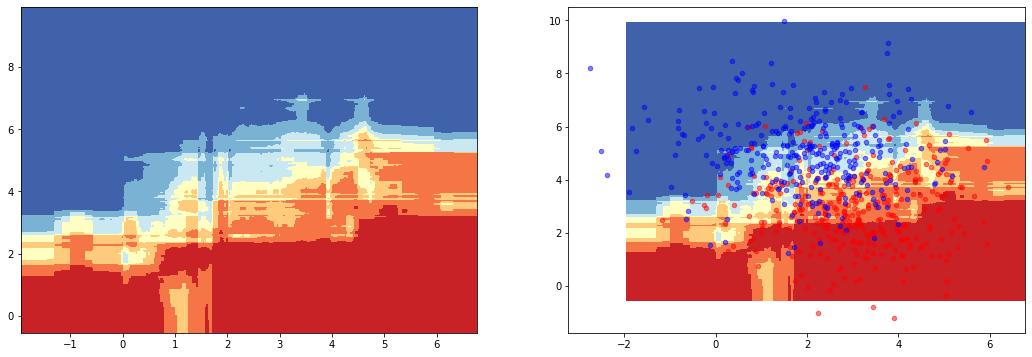

In [9]:
gen_catboost(X_train, y_train, X_test, y_test)